In [2]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nba_py as nba
from nba_py import player


print nba.player

<module 'nba_py.player' from '/home/keenan/anaconda2/lib/python2.7/site-packages/nba_py/player.pyc'>


In [4]:
stephCareer = nba.player.PlayerCareer(201939)
print stephCareer

<nba_py.player.PlayerCareer instance at 0x7f5ea94d9878>


In [6]:
pgl = nba.player.PlayerGameLogs(201939)
print pgl.json

{u'resource': u'playergamelog', u'resultSets': [{u'headers': [u'SEASON_ID', u'Player_ID', u'Game_ID', u'GAME_DATE', u'MATCHUP', u'WL', u'MIN', u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT', u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS', u'PLUS_MINUS', u'VIDEO_AVAILABLE'], u'rowSet': [[u'22014', 201939, u'0021401229', u'APR 15, 2015', u'GSW vs. DEN', u'W', 19, 4, 10, 0.4, 2, 4, 0.5, 0, 0, 0.0, 2, 2, 4, 7, 5, 0, 2, 1, 10, 14, 1], [u'22014', 201939, u'0021401212', u'APR 13, 2015', u'GSW vs. MEM', u'W', 29, 6, 10, 0.6, 3, 6, 0.5, 0, 0, 0.0, 0, 4, 4, 8, 1, 0, 3, 2, 15, 24, 1], [u'22014', 201939, u'0021401192', u'APR 11, 2015', u'GSW vs. MIN', u'W', 35, 11, 21, 0.524, 5, 11, 0.455, 7, 8, 0.875, 0, 4, 4, 7, 4, 0, 3, 1, 34, 17, 1], [u'22014', 201939, u'0021401174', u'APR 09, 2015', u'GSW vs. POR', u'W', 35, 17, 23, 0.739, 8, 13, 0.615, 3, 3, 1.0, 1, 1, 2, 10, 0, 0, 4, 2, 45, 21, 1], [u'22014', 201939, u'0021401156', u'APR 07, 2015'

In [9]:
pst = nba.player.PlayerShotTracking(201939)
pst = pst.touch_time_shooting()
print pst


   PLAYER_ID PLAYER_NAME_LAST_FIRST  SORT_ORDER  GP   G   TOUCH_TIME_RANGE  \
0     201939         Curry, Stephen           1  80  80  Touch < 2 Seconds   
1     201939         Curry, Stephen           2  80  80  Touch 2-6 Seconds   
2     201939         Curry, Stephen           3  80  72   Touch 6+ Seconds   

   FGA_FREQUENCY   FGM   FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  \
0          0.390  3.28  6.44   0.509    0.665           0.133  1.26  2.20   
1          0.382  3.06  6.30   0.486    0.563           0.229  2.09  3.79   
2          0.229  1.74  3.78   0.460    0.533           0.157  1.19  2.60   

   FG2_PCT  FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0    0.574           0.257  2.01  4.24    0.475  
1    0.551           0.152  0.98  2.51    0.388  
2    0.457           0.071  0.55  1.18    0.468  


In [11]:
def getPlayerId(name):
    name = name.split(' ')
    player = nba.player.get_player(name[0], name[1], just_id=True)
    return player
    
    
id = getPlayerId("stephen curry")
print id


773    201939
Name: PERSON_ID, dtype: int64


In [12]:
def shotClockGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.shot_clock_shooting()
    
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.SHOT_CLOCK_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.SHOT_CLOCK_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")
    plt.savefig(name+"shotClock.png")

In [14]:
def defenderGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.closest_defender_shooting()
        
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.CLOSE_DEF_DIST_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.CLOSE_DEF_DIST_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")
    plt.savefig(name+"defender.png")

In [15]:
def dribbleGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.dribble_shooting()
        
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.DRIBBLE_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.DRIBBLE_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")
    plt.savefig(name+"dribble.png")

In [16]:
def touchGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.touch_time_shooting()
    
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.TOUCH_TIME_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.TOUCH_TIME_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")
    plt.savefig(name+"touch.png")

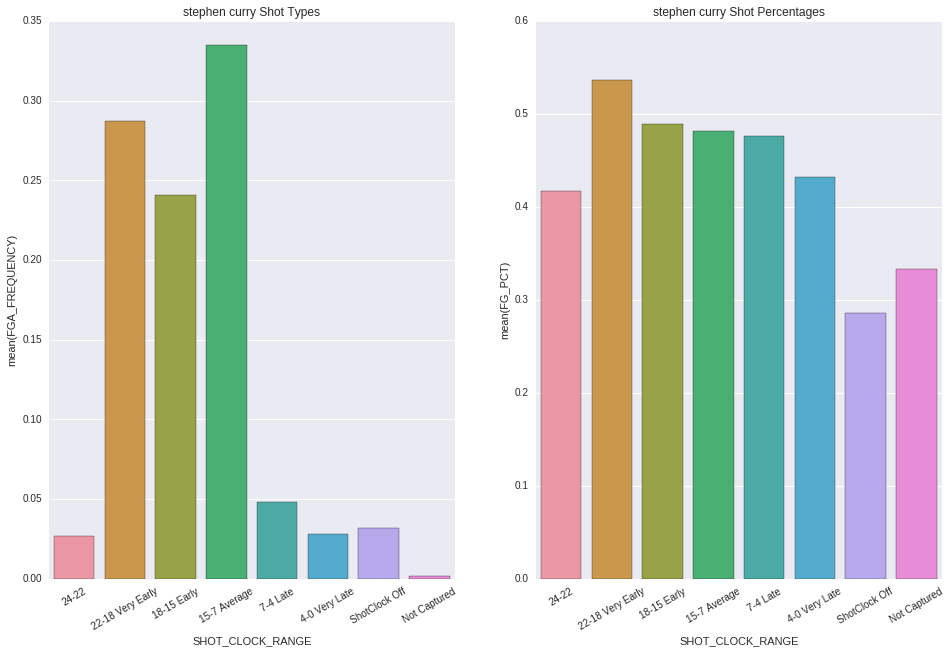

In [13]:
shotClockGraph('stephen curry')

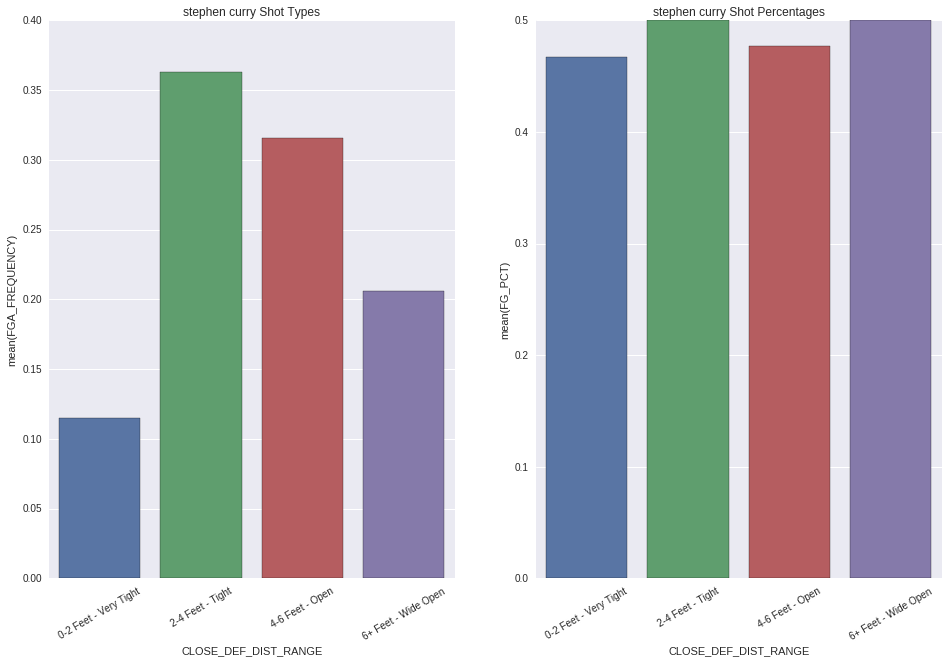

In [17]:
defenderGraph('stephen curry')

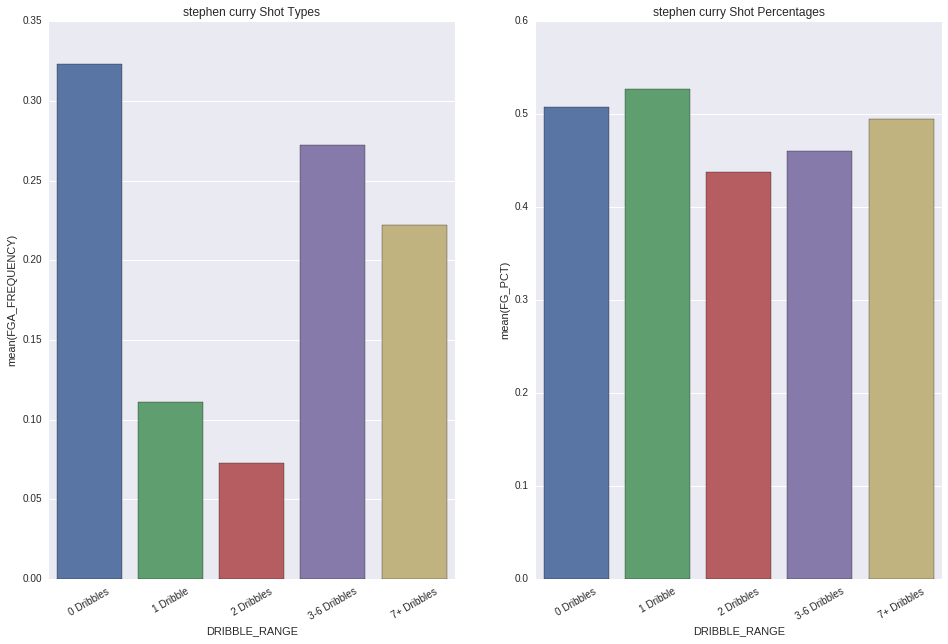

In [18]:
dribbleGraph('stephen curry')

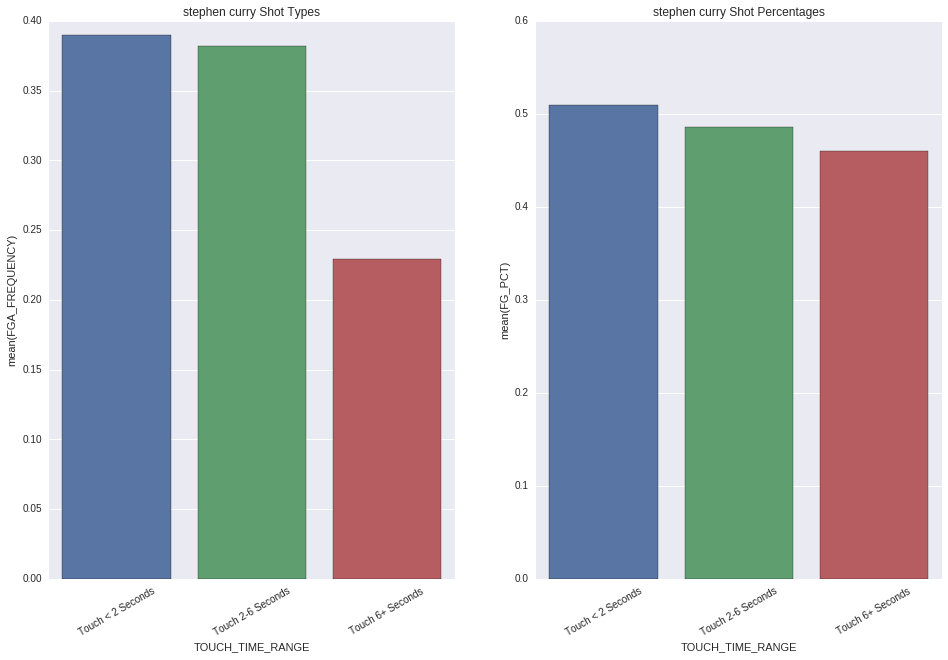

In [19]:
touchGraph('stephen curry')

In [5]:
ppt =  nba.player.PlayerPassTracking(201939)

ppt = ppt.passes_made()
print ppt

    PLAYER_ID PLAYER_NAME_LAST_FIRST              TEAM_NAME     TEAM_ID  \
0      201939         Curry, Stephen  Golden State Warriors  1610612744   
1      201939         Curry, Stephen  Golden State Warriors  1610612744   
2      201939         Curry, Stephen  Golden State Warriors  1610612744   
3      201939         Curry, Stephen  Golden State Warriors  1610612744   
4      201939         Curry, Stephen  Golden State Warriors  1610612744   
5      201939         Curry, Stephen  Golden State Warriors  1610612744   
6      201939         Curry, Stephen  Golden State Warriors  1610612744   
7      201939         Curry, Stephen  Golden State Warriors  1610612744   
8      201939         Curry, Stephen  Golden State Warriors  1610612744   
9      201939         Curry, Stephen  Golden State Warriors  1610612744   
10     201939         Curry, Stephen  Golden State Warriors  1610612744   
11     201939         Curry, Stephen  Golden State Warriors  1610612744   
12     201939         Cur